### For use with google collab:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/FACT
!ls

/content/drive/MyDrive/FACT
'FACT results processing.ipynb'   Results


# How to run:
Place the results in the Results folder and run all the code below.

In [5]:
import pandas
import numpy as np
import os

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

#Help functions

In [6]:
def explainer_names(input):
    explainer_dict = {'pbone' : 'PBONE', 'attn': 'ATTN', 'pg' : 'PG', 'subgraphx' : 'T-GNNExplainer' }
    output = []
    for name in input:
        output.append(explainer_dict[name])
    return output

def get_names(csv_names):
    models = []
    datasets = []
    explainers = []
    navigator = []
    for name in csv_names:
        i = 2
        parts = name.split('_')
        models.append(parts[0].split('/')[1])
        if parts[1] == 'simulate':
            datasets.append(parts[1] + '_' + parts[2])
            i += 1
        else:
            datasets.append(parts[1])
        explainers.append(parts[i])
    return models, datasets, explainer_names(explainers)

In [15]:
folder = 'Results'

def load_data(dataset_name, model, pos_or_neg = False, folder = 'Results'):
    dataset = []
    all_files = os.listdir(folder)
    csv_files = ['Results/' + file for file in all_files if "eval" in file and dataset_name in file and model in file]
    print(csv_files)
    if pos_or_neg:
        csv_files = [file for file in csv_files if 'subgraphx' not in file or pos_or_neg in file]
    names = get_names(csv_files)

    for i, file_name in enumerate(csv_files):
        file = pandas.read_csv(file_name, sep=',')
        dataset.append(file)

    #dataset = np.concatenate(dataset)
    return dataset, names

def load_tgnne_data(data, model, notin = 'upgraded', folder = 'Results'):
    dataset = []
    all_files = os.listdir(folder)
    csv_files = ['Results/' + file for file in all_files if "eval" in file and "subgraphx" in file and data in file and model in file and notin not in file]
    names = get_names(csv_files)
    print(csv_files)
    nav = []

    for i, file_name in enumerate(csv_files):
        file = pandas.read_csv(file_name, sep=',')
        dataset.append(file)
        if 'pg_true' in file_name:
            nav.append('with_nav')
        else:
            nav.append('no_nav')

    #dataset = np.concatenate(dataset)
    return dataset, names, nav

data, names = load_data('wikipedia', 'tgat')

results1 = data[2]
results1.head()


['Results/tgat_wikipedia_attn_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_pbone_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_pg_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive_upgraded.csv']


,event_idx,sparsity,fid_inv,fid_inv_best
0,110314,0.00,-6.529730,-6.529730
1,110314,0.05,-0.194380,-0.194380
2,110314,0.10,1.285809,1.285809
3,110314,0.15,1.976487,1.976487
4,110314,0.20,1.976487,1.976487


In [8]:
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

print(integrate([0,1], [0,0.5]))

0.25


In [ ]:
print(names)

(['tgat', 'tgat', 'tgat'], ['wikipedia', 'wikipedia', 'wikipedia'], ['ATTN', 'PBONE', 'PG'])


#Figures

['Results/tgat_reddit_pg_explainer_tg_470920_to_665351_eval.csv', 'Results/tgat_reddit_pbone_explainer_tg_470920_to_665351_eval.csv', 'Results/tgat_reddit_attn_explainer_tg_470920_to_665351_eval.csv', 'Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_false.csv', 'Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv']


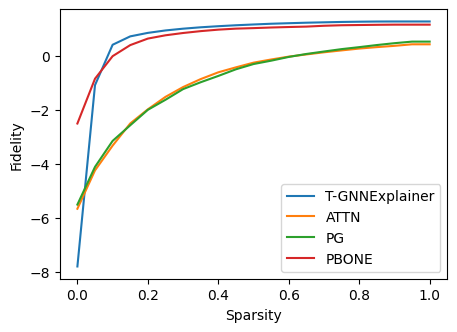

In [6]:
data, names = load_data('reddit', 'tgat', 'true')
plt.figure(figsize=(5,3.5))
order = ['T-GNNExplainer', 'ATTN','PG', 'PBONE']

for expl in order:
    if expl in names[2]:
        index = names[2].index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()


['Results/tgat_wikipedia_attn_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_pbone_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_pg_explainer_tg_110314_to_155614_eval.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv']
(['tgat', 'tgat', 'tgat', 'tgat'], ['wikipedia', 'wikipedia', 'wikipedia', 'wikipedia'], ['ATTN', 'PBONE', 'PG', 'T-GNNExplainer'])


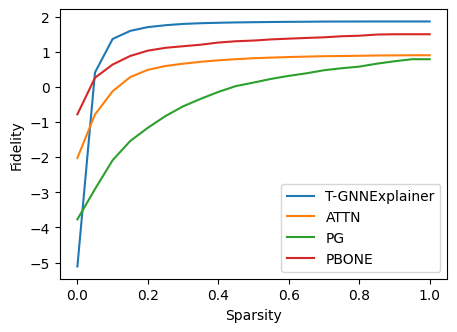

In [7]:
data, names = load_data('wikipedia', 'tgat', 'positive')
print(names)
plt.figure(figsize=(5,3.5))
order = ['T-GNNExplainer', 'ATTN','PG', 'PBONE']

for expl in order:
    if expl in names[2]:
        index = names[2].index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()


['Results/tgn_reddit_attn_explainer_tg_470920_to_665351_eval.csv', 'Results/tgn_reddit_pbone_explainer_tg_470920_to_665351_eval.csv', 'Results/tgn_reddit_pg_explainer_tg_470920_to_665351_eval.csv', 'Results/tgn_reddit_subgraphx_tg_470920_to_665351_eval_pg_false.csv', 'Results/tgn_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv']


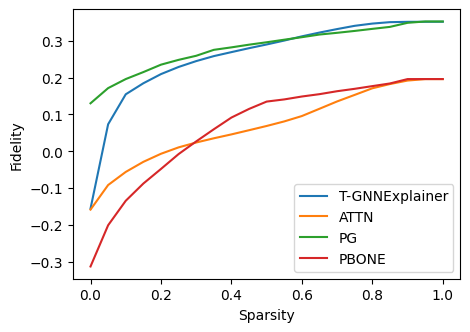

In [8]:
data, names = load_data('reddit', 'tgn', 'positive')
plt.figure(figsize=(5,3.5))
order = ['T-GNNExplainer', 'ATTN','PG', 'PBONE']

for expl in order:
    if expl in names[2]:
        index = names[2].index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()


['Results/tgn_wikipedia_attn_explainer_tg_110314_to_155614_eval.csv', 'Results/tgn_wikipedia_pbone_explainer_tg_110314_to_155614_eval.csv', 'Results/tgn_wikipedia_pg_explainer_tg_110314_to_155614_eval.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv']


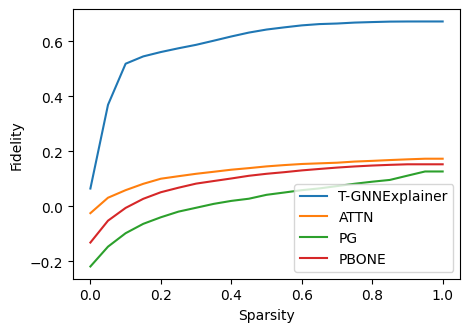

In [9]:
data, names = load_data('wikipedia', 'tgn', 'positive')
plt.figure(figsize=(5,3.5))
order = ['T-GNNExplainer', 'ATTN','PG', 'PBONE']

for expl in order:
    if expl in names[2]:
        index = names[2].index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()


## Navigator graphs

['Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv']


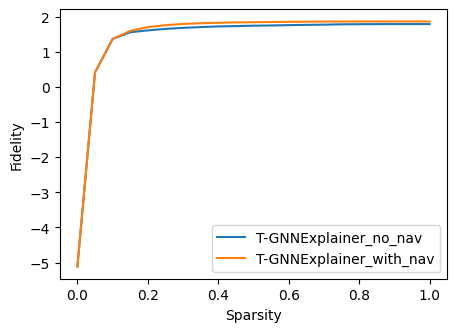

In [23]:
data, names, nav = load_tgnne_data('wikipedia', 'tgat')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()


['Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv']


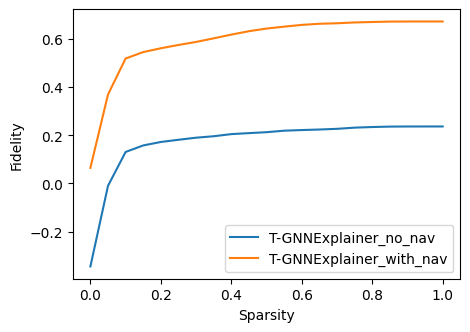

In [24]:
data, names, nav = load_tgnne_data('wikipedia', 'tgn')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_false.csv', 'Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv']


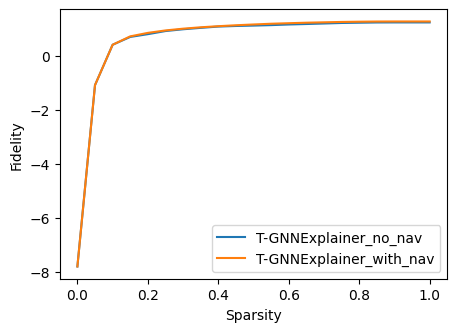

In [25]:
data, names, nav = load_tgnne_data('reddit', 'tgat')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgn_reddit_subgraphx_tg_470920_to_665351_eval_pg_false.csv', 'Results/tgn_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv']


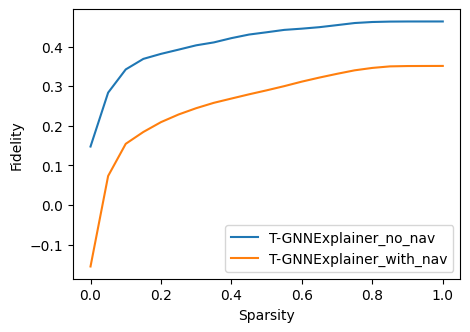

In [26]:
data, names, nav = load_tgnne_data('reddit', 'tgn')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgat_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_false.csv', 'Results/tgat_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive.csv']


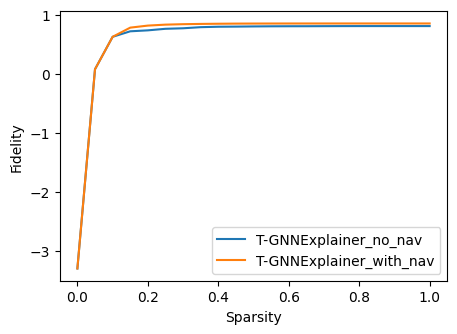

In [29]:
data, names, nav = load_tgnne_data('simulate_v1', 'tgat')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgn_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_false.csv', 'Results/tgn_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive.csv']


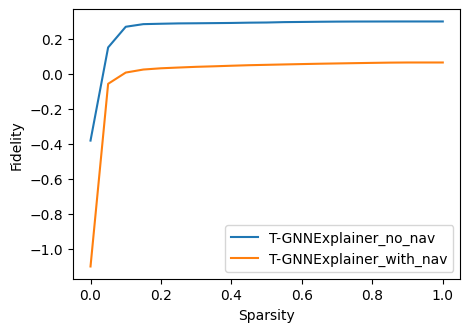

In [30]:
data, names, nav = load_tgnne_data('simulate_v1', 'tgn')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgat_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_true_pg_positive.csv', 'Results/tgat_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_false.csv']


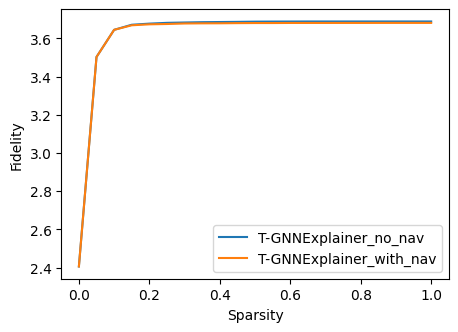

In [27]:
data, names, nav = load_tgnne_data('simulate_v2', 'tgat')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

['Results/tgn_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_true_pg_positive.csv', 'Results/tgn_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_false.csv']


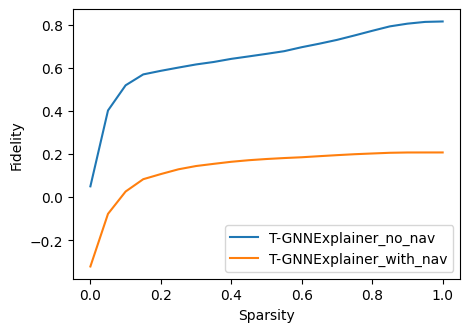

In [28]:
data, names, nav = load_tgnne_data('simulate_v2', 'tgn')

plt.figure(figsize=(5,3.5))
order = ['no_nav', 'with_nav']

for expl in order:
    if expl in nav:
        index = nav.index(expl)
        result = data[index]
    else:
        continue

    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    plt.plot(final_results['sparsity'], final_results['fid_inv_best'], label=names[2][index]+ '_' + nav[index])
    plt.ylabel('Fidelity')
    plt.xlabel('Sparsity')

plt.legend()
plt.show()

#Benchmarks compared to baselines



## Best-fid

In [13]:
def load_all_data(pos_or_neg = False, folder = 'Results'):
    names = []
    dataset = []
    all_files = os.listdir(folder)
    csv_files = ['Results/' + file for file in all_files if "eval" in file]
    if pos_or_neg:
        csv_files2 = [file for file in csv_files if 'subgraphx' not in file or pos_or_neg in file]
        csv_files = csv_files2
    names = get_names(csv_files)

    for i, file_name in enumerate(csv_files):
        file = pandas.read_csv(file_name, sep=',')
        dataset.append(file)

    #dataset = np.concatenate(dataset)
    return dataset, names

data, names = load_all_data('true')

for i, dataset in enumerate(data):
    max_fid = dataset.loc[dataset['sparsity'] == 1.0].mean()
    #max_fid = dataset.groupby('event_idx', as_index=False)['fid_inv_best'].max().mean()
    #max_fid = dataset.mean()
    print(names[0][i] + '_' + names[1][i] + '_' + names[2][i] + ':')
    print(max_fid['fid_inv_best'])
    print()

tgat_reddit_PG:
0.5362546602189541

tgat_reddit_PBONE:
1.1656666078269482

tgat_reddit_ATTN:
0.43649912026524545

tgat_wikipedia_ATTN:
0.8978705624714494

tgat_wikipedia_PBONE:
1.495159070201218

tgat_wikipedia_PG:
0.7853388606607914

tgn_reddit_ATTN:
0.19569305549934507

tgn_wikipedia_ATTN:
0.17323312585800887

tgn_simulate_v2_PBONE:
0.08754520857334135

tgn_reddit_PBONE:
0.1958191196396947

tgn_simulate_v2_PG:
0.0018549642562866115

tgn_simulate_v1_PBONE:
0.19694082352519035

tgn_simulate_v1_ATTN:
0.05635971784591671

tgn_simulate_v1_PG:
0.11604700601100919

tgn_reddit_PG:
0.3518678258880973

tgn_simulate_v2_ATTN:
0.0035860501527786113

tgn_wikipedia_PBONE:
0.15294071173667909

tgn_wikipedia_PG:
0.12685049466788767

tgat_simulate_v1_T-GNNExplainer:
0.8486517965197563

tgat_wikipedia_T-GNNExplainer:
1.858717098362744

tgn_wikipedia_T-GNNExplainer:
0.6722819291912019

tgn_simulate_v2_T-GNNExplainer:
0.20802535891532897

tgn_simulate_v1_T-GNNExplainer:
0.06455455714464184

tgat_simulate

##AUFSC scores

In [12]:
data, names = load_all_data('true')
print('AUFSC scores')
for i, result in enumerate(data):
    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    print(names[0][i] + '_' + names[1][i] + '_' + names[2][i] + ':')
    print(integrate(np.array(final_results['sparsity']), np.array(final_results['fid_inv_best'])))
    print()

    #print(final_results['fid_inv_best'].mean())

AUFSC scores
tgat_reddit_PG:
-0.8798284575114026

tgat_reddit_PBONE:
0.7636137264009566

tgat_reddit_ATTN:
-0.8876198980543762

tgat_wikipedia_ATTN:
0.5723902385029941

tgat_wikipedia_PBONE:
1.1686838340735064

tgat_wikipedia_PG:
-0.31331918538901965

tgn_reddit_ATTN:
0.06993565836260095

tgn_wikipedia_ATTN:
0.12892098577329889

tgn_simulate_v2_PBONE:
0.08289050028622147

tgn_reddit_PBONE:
0.07105818329043684

tgn_simulate_v2_PG:
-0.02245739670693871

tgn_simulate_v1_PBONE:
0.14810656179171056

tgn_simulate_v1_ATTN:
0.0485905987065285

tgn_simulate_v1_PG:
0.10979338989220558

tgn_reddit_PG:
0.28251508003734055

tgn_simulate_v2_ATTN:
-0.09624819984734057

tgn_wikipedia_PBONE:
0.09438561865855008

tgn_wikipedia_PG:
0.021778617657534763

tgat_simulate_v1_T-GNNExplainer:
0.6870964030243457

tgat_wikipedia_T-GNNExplainer:
1.5481732186198238

tgn_wikipedia_T-GNNExplainer:
0.6005489271799103

tgn_simulate_v2_T-GNNExplainer:
0.140340250172466

tgn_simulate_v1_T-GNNExplainer:
0.0147751964882015

# Navigator benchmarks

## With navigator vs without navigator

In [17]:
data, names, nav = load_tgnne_data('', '')

for i, result in enumerate(data):
    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    max_fid = result.loc[result['sparsity'] == 1.0].mean()
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    print(names[0][i] + '_' + names[1][i] + '_' + names[2][i] + '_' + nav[i] + ':')
    print('best_fid: ' + str(round(max_fid['fid_inv_best'], 3)))
    print('AUFSC: ' + str(round(integrate(np.array(final_results['sparsity']), np.array(final_results['fid_inv_best'])), 3)))
    print()



['Results/tgat_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_false.csv', 'Results/tgat_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive.csv', 'Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv', 'Results/tgn_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_true_pg_positive.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_false.csv', 'Results/tgn_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_false.csv', 'Results/tgn_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive.csv', 'Results/tgn_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_false.csv', 'Results/tgat_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_true_pg_positive.csv', 'Results/tgat_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_false.csv', 'Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_false.csv', 'Results/tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.cs

## Upgraded navigator

In [9]:
data, names, nav = load_tgnne_data('upgraded', '', '')

for i, result in enumerate(data):
    #max_index = result.max(0)['event_idx']
    #final_results = result.loc[result['event_idx'] == max_index]
    max_fid = result.loc[result['sparsity'] == 1.0].mean()
    final_results = result.groupby('sparsity', as_index=False)['fid_inv_best'].mean()
    print(names[0][i] + '_' + names[1][i] + '_' + names[2][i] + '_' + nav[i] + ':')
    print('best_fid: ' + str(round(max_fid['fid_inv_best'], 3)))
    print('AUFSC: ' + str(round(integrate(np.array(final_results['sparsity']), np.array(final_results['fid_inv_best'])), 3)))
    print()


['Results/tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive_upgraded.csv', 'Results/tgat_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive_upgraded.csv', 'Results/tgn_simulate_v1_subgraphx_tg_28_to_16017_eval_pg_true_pg_positive_upgraded.csv', 'Results/tgn_simulate_v2_subgraphx_tg_32_to_21752_eval_pg_true_pg_positive_upgraded.csv', 'Results/tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive_upgraded.csv']
tgat_wikipedia_T-GNNExplainer__with_nav:
best_fid: 1.859
AUFSC: 1.548

tgat_simulate_v1_T-GNNExplainer__with_nav:
best_fid: 0.849
AUFSC: 0.687

tgn_simulate_v1_T-GNNExplainer__with_nav:
best_fid: 0.3
AUFSC: 0.226

tgn_simulate_v2_T-GNNExplainer__with_nav:
best_fid: 0.078
AUFSC: 0.003

tgn_wikipedia_T-GNNExplainer__with_nav:
best_fid: 0.402
AUFSC: 0.367

